In [2]:
pip install fredapi


[*********************100%***********************]  1 of 1 completed
<ipython-input-15-e7861c8d9471>:58: UserWarning: Glyph 127482 (\N{REGIONAL INDICATOR SYMBOL LETTER U}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-15-e7861c8d9471>:58: UserWarning: Glyph 127480 (\N{REGIONAL INDICATOR SYMBOL LETTER S}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-15-e7861c8d9471>:58: UserWarning: Glyph 127468 (\N{REGIONAL INDICATOR SYMBOL LETTER G}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-15-e7861c8d9471>:58: UserWarning: Glyph 127463 (\N{REGIONAL INDICATOR SYMBOL LETTER B}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-15-e7861c8d9471>:58: UserWarning: Glyph 127465 (\N{REGIONAL INDICATOR SYMBOL LETTER D}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-15-e7861c8d9471>:58: UserWarning: Glyph 127466 (\N{REGIONAL INDICATOR SYMBOL LETTER E}) missing from font(s) DejaVu Sans.
  pl

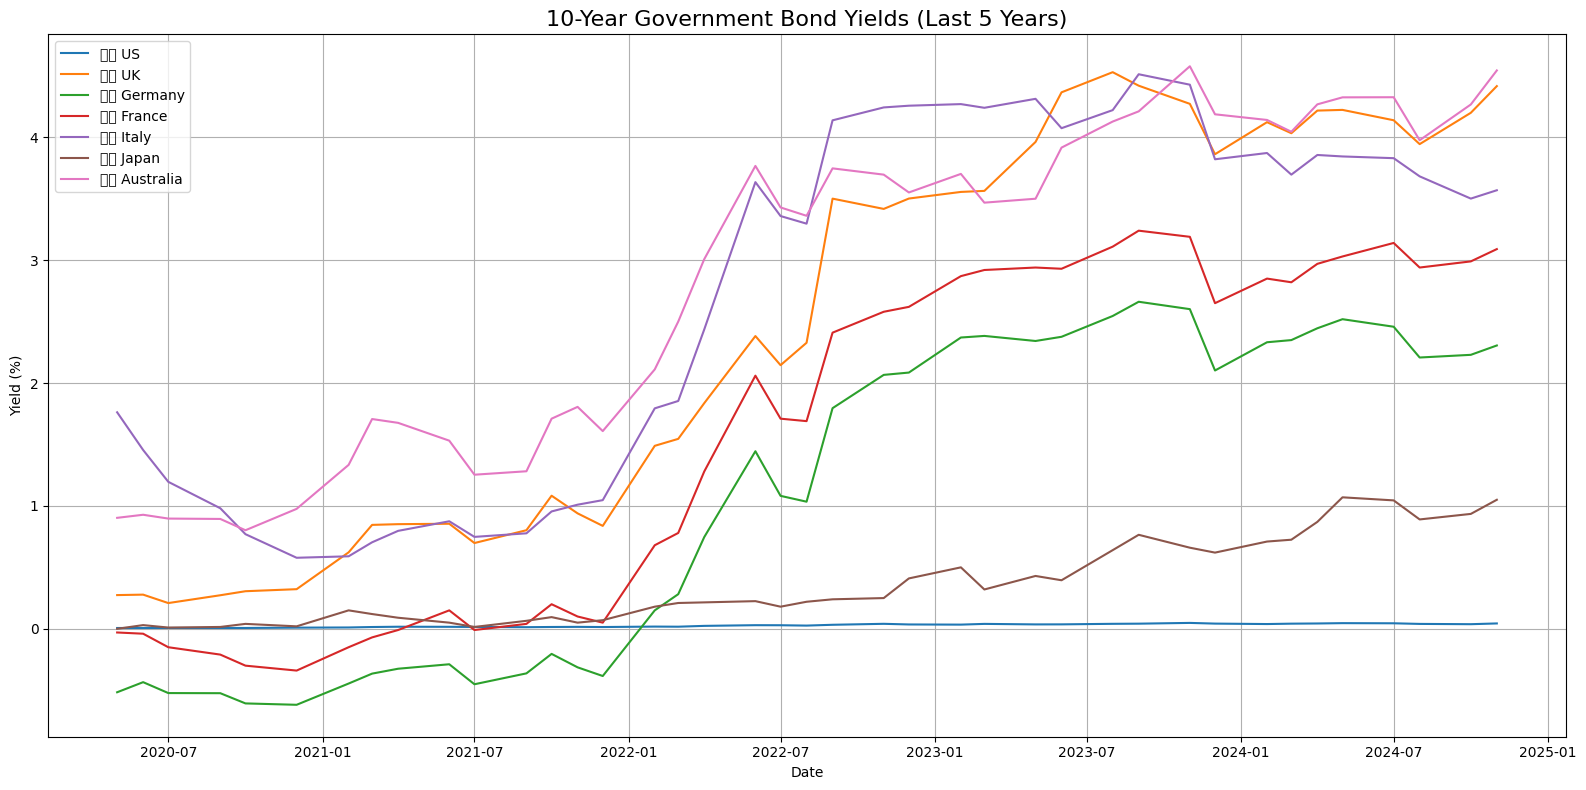


🔍 Average 10-Year Government Bond Yields (Last 5 Years):
AU_10Y_Yield: 2.85%
IT_10Y_Yield: 2.67%
UK_10Y_Yield: 2.43%
FR_10Y_Yield: 1.57%
DE_10Y_Yield: 1.06%
JP_10Y_Yield: 0.36%
US_10Y_Yield: 0.03%


In [15]:
import yfinance as yf
from fredapi import Fred
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# Define time range: Last 5 years
end_date = datetime.today()
start_date = end_date - timedelta(days=5*365)

# Step 1: US 10-Year Bond Yield (^TNX from Yahoo Finance)
us10y = yf.download("^TNX", start=start_date.strftime('%Y-%m-%d'), end=end_date.strftime('%Y-%m-%d'))
us10y = us10y.reset_index()[['Date', 'Close']]
us10y.columns = ['Date', 'US_10Y_Yield']
us10y['US_10Y_Yield'] = us10y['US_10Y_Yield'] / 100  # Convert from basis points to %

# Step 2: Initialize FRED API
fred = Fred(api_key='9f6b3c52c58b1abc1cfceed0a1417b9e')

# Step 3: Get bond yield data from FRED for other countries
country_series = {
    'UK_10Y_Yield': 'IRLTLT01GBM156N',
    'DE_10Y_Yield': 'IRLTLT01DEM156N',
    'FR_10Y_Yield': 'IRLTLT01FRM156N',
    'IT_10Y_Yield': 'IRLTLT01ITM156N',
    'JP_10Y_Yield': 'IRLTLT01JPM156N',
    'AU_10Y_Yield': 'IRLTLT01AUM156N'
}

# Step 4: Retrieve and format FRED data
all_bonds = {}
for name, series_id in country_series.items():
    data = fred.get_series(series_id, observation_start=start_date)
    df_temp = data.reset_index()
    df_temp.columns = ['Date', name]
    all_bonds[name] = df_temp

# Step 5: Merge all datasets
df = us10y
for bond_df in all_bonds.values():
    df = pd.merge(df, bond_df, on='Date', how='inner')

# Step 6: Plotting
plt.figure(figsize=(16, 8))
plt.plot(df['Date'], df['US_10Y_Yield'], label='🇺🇸 US')
plt.plot(df['Date'], df['UK_10Y_Yield'], label='🇬🇧 UK')
plt.plot(df['Date'], df['DE_10Y_Yield'], label='🇩🇪 Germany')
plt.plot(df['Date'], df['FR_10Y_Yield'], label='🇫🇷 France')
plt.plot(df['Date'], df['IT_10Y_Yield'], label='🇮🇹 Italy')
plt.plot(df['Date'], df['JP_10Y_Yield'], label='🇯🇵 Japan')
plt.plot(df['Date'], df['AU_10Y_Yield'], label='🇦🇺 Australia')

plt.title('10-Year Government Bond Yields (Last 5 Years)', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Yield (%)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 🔍 Additional Insight: Average Yield Per Country
print("\n🔍 Average 10-Year Government Bond Yields (Last 5 Years):")
avg_yields = df.mean(numeric_only=True).sort_values(ascending=False)
for country, avg in avg_yields.items():
    print(f"{country}: {avg:.2f}%")
